In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import defaultdict
import math

warnings.filterwarnings("ignore")

In [2]:
data = dict()
years = {"2017","2018","2019","2020","2021"}

data["2017"] = [pd.read_csv("data/2017/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2017/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI")]
data["2018"] = [pd.read_csv("data/2018/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2018/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2018/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2018/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]
data["2019"] = [pd.read_csv("data/2019/napake.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/uspesnost.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2019/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2019/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]
data["2020"] = [pd.read_csv("data/2020/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2020/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2020/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2020/NIO_tz_meritve_1.csv", delimiter=";", encoding="ANSI"), pd.read_csv("data/2020/NIO_tz_meritve_2.csv", delimiter=";", encoding="ANSI")])]
data["2021"] = [pd.read_csv("data/2021/napake.csv", delimiter=";", encoding="UTF-8"), pd.concat([pd.read_csv("data/2021/uspesnost1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/uspesnost2.csv", delimiter=";", encoding="UTF-8")]), pd.concat([pd.read_csv("data/2021/NIO_tz_meritve_1.csv", delimiter=";", encoding="UTF-8"), pd.read_csv("data/2021/NIO_tz_meritve_2.csv", delimiter=";", encoding="UTF-8")])]

## Neuspeli pregledi po letih

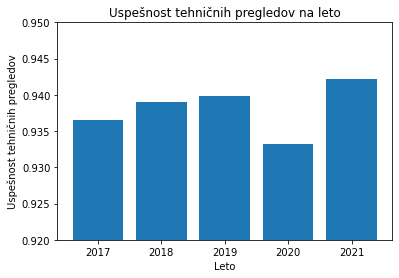

In [3]:
neuspesni_tehnicni_per_year = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')].shape[0]]

tehnicni_per_year = [data["2017"][1].shape[0], data["2018"][1].shape[0], data["2019"][1].shape[0], data["2020"][1].shape[0], data["2021"][1].shape[0]]


tehnicni_zip = zip(tehnicni_per_year, neuspesni_tehnicni_per_year)
procent_uspesnosti = []

for stevilo, neuspesni in tehnicni_zip:
    procent_uspesnosti.append((stevilo-neuspesni) / stevilo)

procent_uspesnosti

fig, ax = plt.subplots()
plt.ylim(0.92, 0.95)
ax.bar(data.keys(), procent_uspesnosti,)
ax.set_xlabel("Leto")
ax.set_ylabel("Uspešnost tehničnih pregledov")
ax.set_title("Uspešnost tehničnih pregledov na leto")
plt.show()
#data["2017"][1]["TEHNICNI_PREGLED_STATUS"].unique()
#data["2017"][0].shape[0]

In [4]:
neuspesno_opravljeni = [data["2017"][1].loc[data["2017"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2018"][1].loc[data["2018"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2019"][1].loc[data["2019"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2020"][1].loc[data["2020"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')],
                                data["2021"][1].loc[data["2021"][1]["TEHNICNI_PREGLED_STATUS"].str.match('^ni.*')]]

50         266430.0
53         301871.0
64         327980.0
73         158059.0
91         263828.0
             ...   
1431413    181000.0
1431428     93796.0
1431480    223008.0
1431492    178290.0
1431552    214777.0
Name: PREVOZENI_KILOMETRI, Length: 90802, dtype: float64

In [5]:
lastnosti = data["2017"][1].columns.values.tolist()

korelacija = defaultdict(list)

for leto in years:
    for lastnost in lastnosti:
        if lastnost != "TEHNICNI_PREGLED_STATUS":
            x = data[leto][1][lastnost].astype("category").cat.codes
            y = data[leto][1]["TEHNICNI_PREGLED_STATUS"].astype("category").cat.codes
            korelacija[lastnost].append(np.corrcoef(x,y)[0,1])
            
korelacija = {k: v for k, v in sorted({ x:abs(np.mean(y)) for x,y in korelacija.items()}.items(), key=lambda item: item[1], reverse=True)}

## Število neupešnih pregledov glede na prevožene kilometre

Text(0.5, 0, 'Število prevožnih kilometrov')

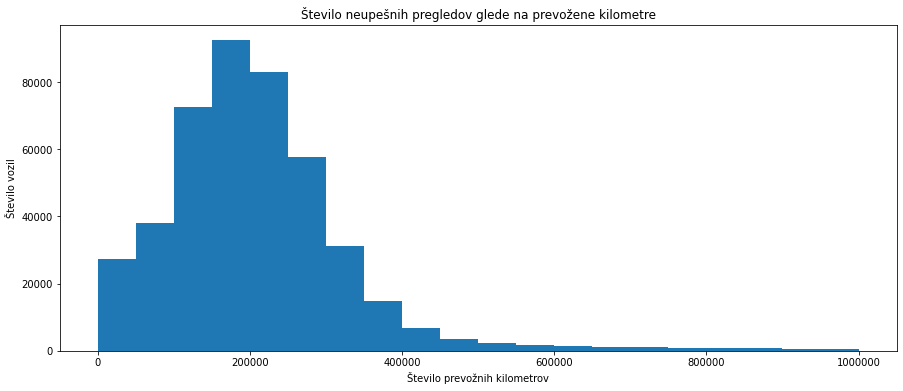

In [6]:
vsi_neuspesni_pregledi = []

for x in range(5):
    vsi_neuspesni_pregledi.extend(i for i in neuspesno_opravljeni[x]["PREVOZENI_KILOMETRI"].values if i < 1000000 and i >= 0)

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(vsi_neuspesni_pregledi, bins=20)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title("Število neupešnih pregledov glede na prevožene kilometre")
ax.set_ylabel("Število vozil")
ax.set_xlabel("Število prevožnih kilometrov")


## Delež neopravljenih tehničnih pregledov glede na znamko

In [7]:
neuspesni_po_znamki = defaultdict(list)

for i,year in enumerate(years):
    for x in neuspesno_opravljeni[i]["ZNAMKA"].unique():
        if (x not in neuspesni_po_znamki.keys()):
            neuspesni_po_znamki[x] = [[],[]]
        a = len(neuspesno_opravljeni[i].loc[neuspesno_opravljeni[i]["ZNAMKA"] == x])
        b = len(data[year][1].loc[data[year][1]["ZNAMKA"] == x])
        
        neuspesni_po_znamki[x][0].append(a)
        neuspesni_po_znamki[x][1].append(b)

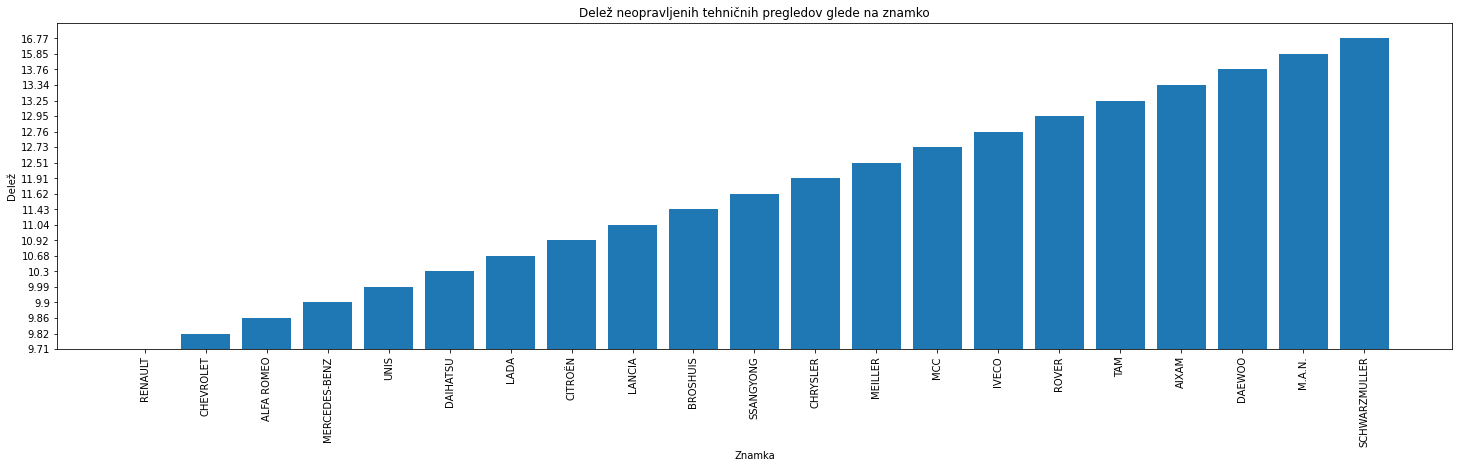

In [8]:
x = np.array([(k,round(v*100, 2)) for k, v in sorted({ x:sum(y[0])/sum(y[1]) for x,y in neuspesni_po_znamki.items() if sum(y[1]) > 1000 }.items(), key=lambda item: item[1], reverse=True)][20::-1])

plt.figure(figsize=(25,6))
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.bar(x[:,0], x[:,1])
plt.title("Delež neopravljenih tehničnih pregledov glede na znamko")
plt.xticks(rotation="vertical")
plt.ylabel("Delež")
plt.xlabel("Znamka")
plt.show()

## Število tehničnih in odstotek uspešnih pregledov

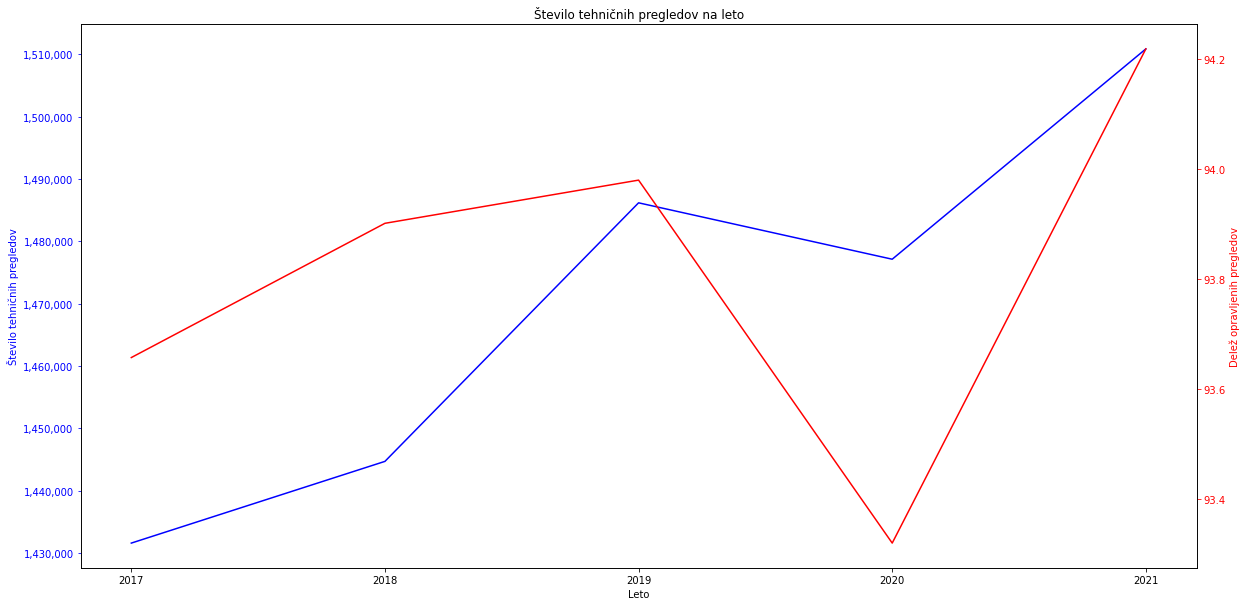

In [9]:
delez_neuspesnih_po_letih = [(1-len(neuspesno_opravljeni[i])/tehnicni_per_year[i])*100 for i in range(5)]

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()

ax.plot(data.keys(), tehnicni_per_year, color="blue")
ax.set_xlabel("Leto")
ax.set_ylabel("Število tehničnih pregledov", color="blue")
ax.set_title("Število tehničnih pregledov na leto")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.tick_params(axis="y", colors="blue", which="both")


ax3 = ax.twinx()
ax3.plot(delez_neuspesnih_po_letih, color="red")
ax3.set_ylabel("Delež opravljenih pregledov", color="red")
ax3.tick_params(axis="y", colors="red", which="both")

plt.show()

## Uvozi vozil

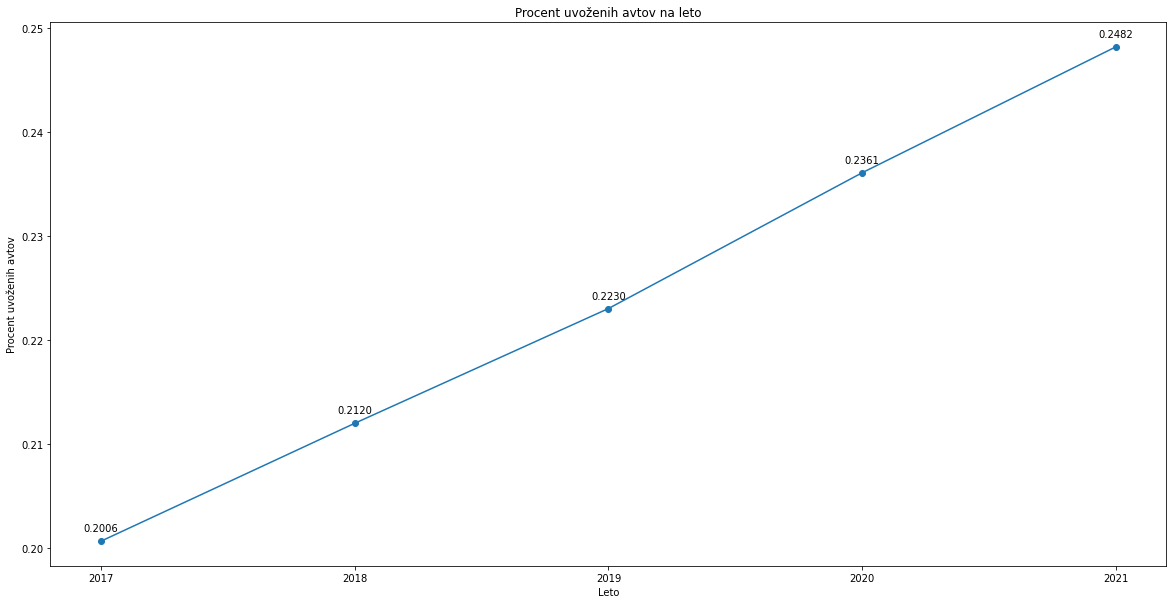

In [10]:
procent_uvozenih = dict()

procent_uvozenih["2017"] = (len(data["2017"][1]) - len(np.where(data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2017"][1])
procent_uvozenih["2018"] = (len(data["2018"][1]) - len(np.where(data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2018"][1])
procent_uvozenih["2019"] = (len(data["2019"][1]) - len(np.where(data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2019"][1])
procent_uvozenih["2020"] = (len(data["2020"][1]) - len(np.where(data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2020"][1])
procent_uvozenih["2021"] = (len(data["2021"][1]) - len(np.where(data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"])[0])) / len(data["2021"][1])

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
ax.plot(procent_uvozenih.keys(), procent_uvozenih.values(), marker='o')
ax.set_xlabel("Leto")
ax.set_ylabel("Procent uvoženih avtov")
ax.set_title("Procent uvoženih avtov na leto")

for x, y in zip(procent_uvozenih.keys(), procent_uvozenih.values()):
    label = "{:.4f}".format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
plt.show()

## Uvozena vozila v primerjavi z domestičnimi

In [11]:
uvozenaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] != data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

domesticnaVozila = [data["2017"][1].loc[data["2017"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2017"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2018"][1].loc[data["2018"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2018"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2019"][1].loc[data["2019"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2019"][1]["DATUM_PRVE_REGISTRACIJE"]],
 data["2020"][1].loc[data["2020"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2020"][1]["DATUM_PRVE_REGISTRACIJE"]], 
 data["2021"][1].loc[data["2021"][1]["DATUM_PRVE_REGISTRACIJE_SLO"] == data["2021"][1]["DATUM_PRVE_REGISTRACIJE"]]]

In [12]:
stevu = 0
stevd = 0
vsad = 0
vsau = 0

for year in range(5):
    vsad += len(domesticnaVozila[year])
    vsau += len(uvozenaVozila[year])

    stevd += len(pd.merge(domesticnaVozila[year], neuspesno_opravljeni[year], how="inner"))
    stevu += len(pd.merge(uvozenaVozila[year], neuspesno_opravljeni[year], how="inner"))


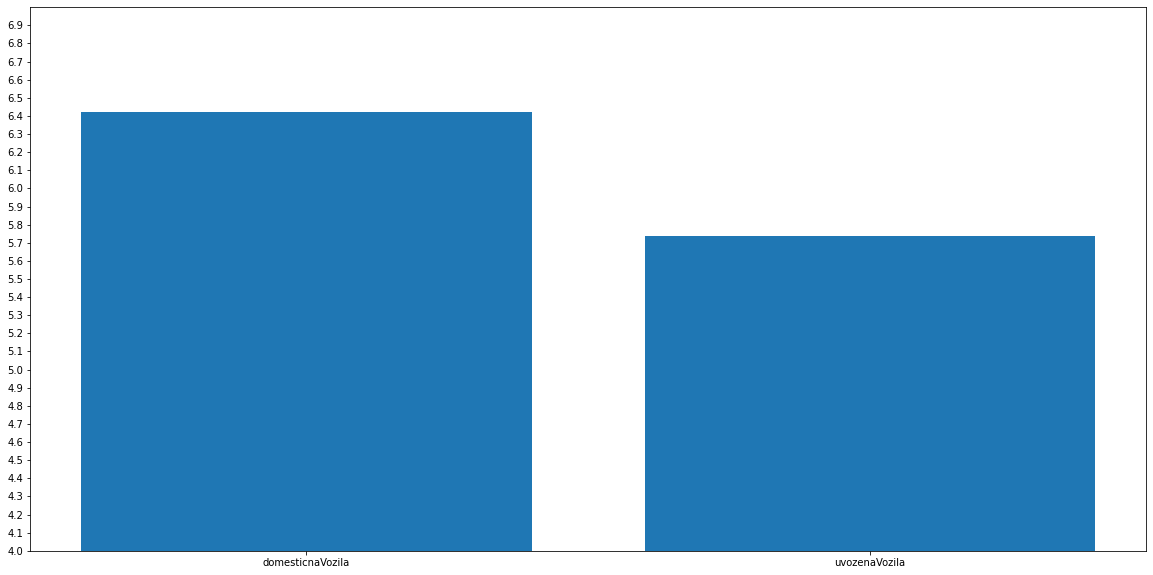

In [13]:
plt.bar(["domesticnaVozila", "uvozenaVozila"], [100*stevd/vsad, 100*stevu/vsau])
plt.yticks(np.arange(4, 7, 0.1))
plt.ylim(4,7)
plt.show()

## Prevrteni kilometri

In [14]:
dict1 = data["2017"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict2 = data["2018"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict3 = data["2019"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict4 = data["2020"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()
dict5 = data["2021"][1].loc[:, ["VIN","PREVOZENI_KILOMETRI"]].set_index("VIN")["PREVOZENI_KILOMETRI"].to_dict()

dd = defaultdict(list)

for d in (dict1, dict2, dict3, dict4, dict5):
    for key, value in d.items():
        if(not math.isnan(value) and value != 0):
            dd[key].append(value)

In [15]:
prevtena_vozila = dict()

for x,v in dd.items():
    if(sorted(v) != v):
        prevtena_vozila[x] = v

{'WF0UXXGAJU7M88105': [137958.0, 152222.0, 143849.0, 170009.0, 180922.0],
 'ZCFD55C8005946674': [3112.0, 3402.0, 3024.0, 4150.0, 4378.0],
 'SJNEAAN16U0483101': [201900.0, 210590.0, 233046.0, 261880.0, 295.0],
 'WDB9036121R955838': [277687.0, 307760.0, 320461.0, 313285.0, 316322.0],
 'VNKKH98350A222863': [27309.0, 34329.0, 77132.0, 39037.0],
 'VF1KW41C153641973': [88393.0, 130608.0, 169650.0, 169110.0, 212400.0],
 'VF1JMRG0634757659': [169912.0, 96584.0, 202070.0, 214000.0, 222843.0],
 'VF3EBRHWB13240788': [256620.0, 245744.0, 286640.0, 298492.0, 311326.0],
 'WAUZZZ8E33A248885': [432460.0, 442810.0, 450012.0, 304211.0, 307326.0],
 'WVWZZZ5ZZ60020582': [42851.0, 45830.0, 48432.0, 506015.0, 52000.0],
 'VF7GJRHYK93030880': [287800.0, 185509.0, 199416.0],
 'WVGZZZ5NZ9W007207': [145810.0, 169300.0, 185228.0, 202246.0, 218.0],
 'VF1BB0S0F22831110': [75626.0, 68530.0, 102698.0, 113544.0, 125071.0],
 'SHHEP23904U205554': [260230.0, 236413.0, 258800.0, 277054.0, 298450.0],
 'RFBD1100061700122': 

In [16]:
df_prevtena_vozila = pd.DataFrame(prevtena_vozila.keys(),columns=["VIN"])

for year in years:
    df_prevtena_vozila = pd.merge(df_prevtena_vozila, data[year][1], how="left", on=["VIN"])

unikatna_prevrtena_vozila = df_prevtena_vozila.drop_duplicates(subset=["VIN"], keep="last")

array([<AxesSubplot:ylabel='ZNAMKA'>], dtype=object)

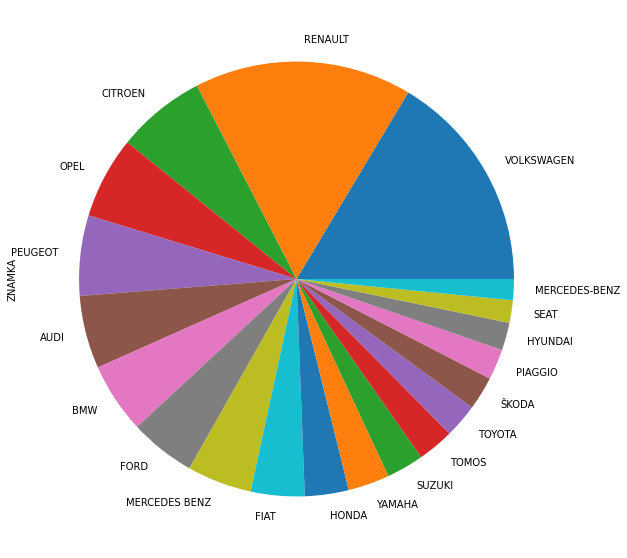

In [17]:
unikatna_prevrtena_vozila["ZNAMKA"].value_counts(normalize=True)[:20].plot.pie(subplots=True)

array([<AxesSubplot:ylabel='NAMEN_VOZILA'>], dtype=object)

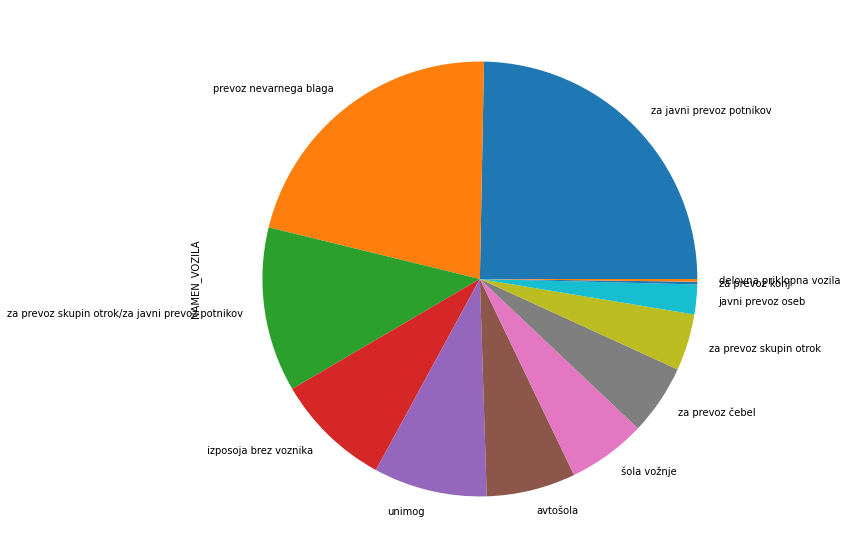

In [18]:
unikatna_prevrtena_vozila["NAMEN_VOZILA"].value_counts(normalize=True)[:20].plot.pie(subplots=True)

## Izvozi vozil

In [19]:
izvozi_1 = data["2017"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_2 = data["2018"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_3 = data["2019"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_4 = data["2020"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()
izvozi_5 = data["2021"][1].loc[:, ["VIN", "VELJA_DO"]].set_index("VIN")["VELJA_DO"].to_dict()

In [20]:
dd = defaultdict(list)

for d in (izvozi_1, izvozi_2, izvozi_3, izvozi_4, izvozi_5):
    for key, value in d.items():
        dd[key].append(value)

izvozi = dict()

for x, y in dd.items():
    if (type(y[-1]) == str and int(y[-1].split(".")[2]) < 2022):
        izvozi[x] = y

{'WAUZZZ4BZ1N098776': ['17.07.2018', '17.07.2019', '17.07.2020'],
 'ZFA18700000551936': ['13.10.2018', '13.10.2019', '13.10.2020', '24.11.2021'],
 'VF1JA050527494371': ['17.01.2018', '17.01.2019'],
 'SWNB35000D0003066': ['15.04.2021'],
 '153644': ['13.04.2018'],
 '001226717': ['08.04.2018', '08.04.2019', '08.04.2020', '08.04.2021'],
 '901045614': ['04.04.2018', '04.04.2019', '04.04.2020', '04.04.2021'],
 'ZFA24400007239710': ['28.10.2018'],
 '1008984': ['26.04.2018'],
 'WAUZZZ8DZYA148370': ['07.02.2018', '07.02.2019', '07.02.2020', '25.09.2021'],
 'XLRTEH4300G007511': ['19.10.2018', nan, '19.10.2020', '19.10.2021'],
 'WVWZZZ6NZVW076440': ['20.04.2018'],
 'VF1BG4TB635115787': ['28.03.2018', '28.03.2019', '19.07.2020', '19.07.2021'],
 'WDF63960113022647': ['25.01.2018', '03.09.2019'],
 'XLRTE47XS0E711153': ['04.05.2018'],
 'KNEBA24426T270123': ['13.06.2018', '13.06.2019'],
 'CF7MCWJZF65544433': ['24.01.2018', nan, '24.01.2020', '24.01.2021'],
 'WF0BXXGAJBXE34976': ['04.06.2018', '04.06.2

In [21]:
df_izvozi_vozil = pd.DataFrame(izvozi.keys(),columns=["VIN"])

for year in years:
    df_izvozi_vozil = pd.merge(df_izvozi_vozil, data[year][1], how="left", on=["VIN"])

unikatna_izvozena_vozila = df_izvozi_vozil.drop_duplicates(subset=["VIN"], keep="last")

array([<AxesSubplot:ylabel='ZNAMKA'>], dtype=object)

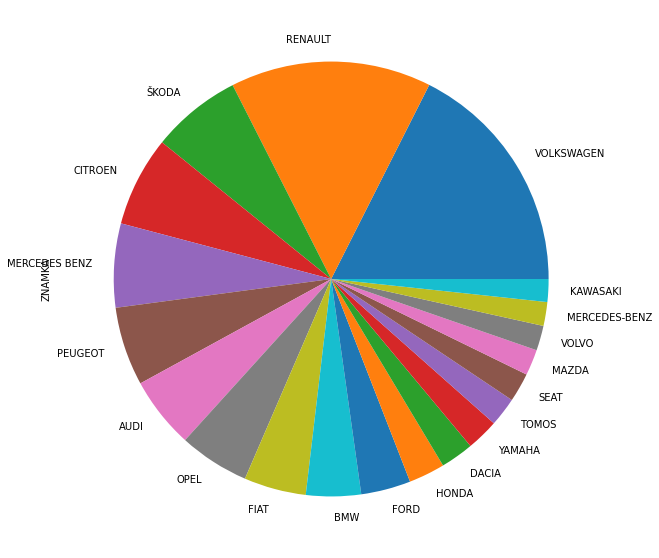

In [22]:
unikatna_izvozena_vozila["ZNAMKA"].value_counts(normalize=True)[:20].plot.pie(subplots=True)